# Trabalho Final - Machine Learnign

Guilherme Hathy - GRR20160217
Davi Yokogawa - GRR20195803
Bianca Trentin - GRR20160214

# Introdução 

Nesse trabalho, foi feito a classificação de imagens de vários tipos de roupa em que o algoritimo deveria ser capaz de classificar corretamente cada uma delas. A abordagem utilizou como principais ferramentas duas das mais difundidas do mercado o TensorFlow e o Keras. O TensorFlow nos ajudando em todo o Workflow de Machine Learning e o Keras nos ajudando na Modelagem da Rede Neural que foi utilizada para a classificação do nosso problema.

### Dados

A base de dados MNIST é uma das principais bases utilizadas para classificação de imagens e benchmarks desses modelos, essa base conta com um grande banco de dados com dígitos manuscritos que vão de 0 a 9. O objetivo de se trabalhar com essa base é conseguir classificar corretamente qual dígito está sendo representado na imagem.

A base utilizada nesse trabalho foi a Fashion-MNIST que é uma espécie de atualização da MNIST, isso porque os estudantes e pessoas das quais estavam aplicando os benchmarks estavam conseguindo excelentes resultados nessa base com modelos simples de classificação de imagem. Na Fashion-MNIST foi adicionado 10 novas categorias de imagem. Sendo elas:

```
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
```

### Ferramentas

#### TensorFlow
Nesse trabalho foi utilizado como ferramenta principal o Tensorflow, uma biblioteca Open Source desenvolvida pelo time do Google para solucionar problemas de Machine Learning.Um dos seus principais diferenciais é a forma com que o Tensorflow te possibilita de processar os dados, em que ele te da a capacidade de processar seus dados em multiplos CPUs e GPUs.

#### Keras
o Keras é uma biblioteca Open Source que funciona muito bem com o TensorFlow e nos possibilita a prototipagem de Redes Neurais Profundas de  maneira modular, extensível e fácil.

# Objetivos

- Ao aplicar essas abordagens, o objetivo principal do trabalho apresentado era conseguir construir um modelo bom o suficiente para classificar as imagens em cada uma de suas categorias, sendo elas Camiseta, Calça, Pullover, Vestido, Casaco, Sandália, Camisam Tênis, Bolsa e Botas.

- Como objetivo secundário desse projeto, buscamos utilizar de ferramentas das quais não faziam parte do nosso ferramental comum, nos trazendo novos desafios e podendo assim nos agregar mais conhecimento e um leque maior no nosso ferramental, nos capacitando de utilizar ferramentas das quais são exigidas no mercado.

In [22]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
from plot_keras_history import show_history, plot_history

# Verificando se o tensorflow ira usar GPU
print(tf.__version__)
print(tf.config.list_physical_devices('GPU'))


2.5.0
[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


# Importando a base de dados

In [17]:

(train_images, train_labels), (test_images,
                               test_labels) = tfds.as_numpy(tfds.load('fashion_mnist', split=['train', 'test'],
                                                                      batch_size=-1, as_supervised=True))


class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

print(
    f"Base de treinamento:{train_images.shape[0]} imagens com {train_images.shape[1]} x {train_images.shape[2]} pixels")

print(
    f"Base de teste:{test_images.shape[0]} imagens com {test_images.shape[1]} x {test_images.shape[2]} pixels")



Base de treinamento:60000 imagens com 28 x 28 pixels
Base de teste:10000 imagens com 28 x 28 pixels


# Pré-processando os dados

Podemos notar que os pixels estão entre 0 e 255

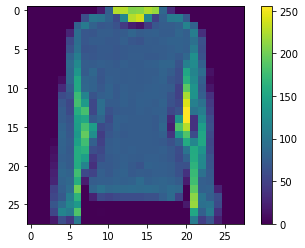

In [18]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

Verificando que esta tudo ok com a base


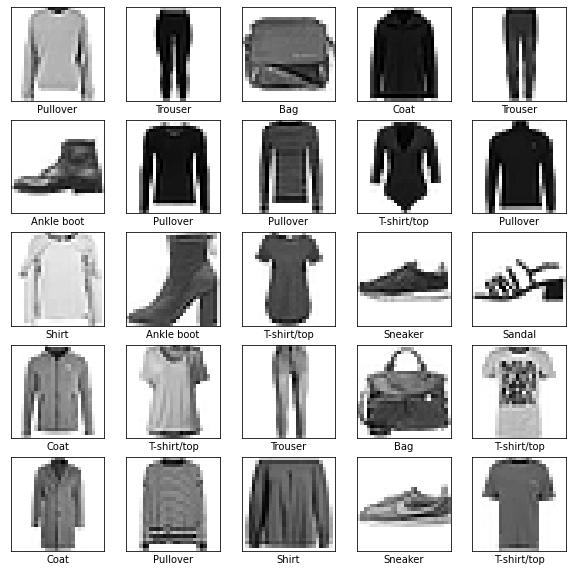

In [19]:
# Vamos padronizar os valores para o intervalo [0,1]
# Vamos confirmar o range de pixel na nossa base
train_images.min()
train_images.max()

test_images.min()
test_images.max()


train_images = train_images / 255.0
test_images = test_images / 255.0


print('Verificando que esta tudo ok com a base')
plt.figure(figsize=(10, 10))
for i in range(25):
    plt.subplot(5, 5, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()


# Gerando o nosso modelo

O principal bloco de construção da rede neural é a camada (layer). As camadas (layers) extraem representações dos dados inseridos na rede.

A nossa rede inicial conta com 4 camadas, sendo que a primeira irá transformar as imagens para o formato 28x28px, a segunda irá normalizar os dados. A terceira camada é um layer chamada densely connected, ou fully connected com 128 neuronios e a ultima é uma softmax, que retornará um array de probabilidades da imagens pertencer a cada uma das 10 classes.

Na função `model.compile` estamos passando que queremos otimizar a rede baseada na metrica de acuracia e a nossa função perda sera a `sparse_categorical_crossentropy`.

In [20]:

model = keras.Sequential([
    # Transforma a imagem na dimensão 28x28px
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.BatchNormalization(),
    # Essas são camadas neurais densely connected, ou fully connected
    keras.layers.Dense(128, activation='relu'),  # 128 nós
    # Retorna uma probabilidade de 10 classes, a soma da 1
    keras.layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_4 (Flatten)          (None, 784)               0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 784)               3136      
_________________________________________________________________
dense_8 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 104,906
Trainable params: 103,338
Non-trainable params: 1,568
_________________________________________________________________


Epoch 1/15


2022-05-06 10:21:24.332455: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1871/1875 [============================>.] - ETA: 0s - loss: 0.4681 - accuracy: 0.8335

2022-05-06 10:21:35.856951: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


1875/1875 [==============================] - 13s 7ms/step - loss: 0.4682 - accuracy: 0.8334 - val_loss: 0.4328 - val_accuracy: 0.8461
Epoch 2/15
1875/1875 [==============================] - 14s 8ms/step - loss: 0.3537 - accuracy: 0.8705 - val_loss: 0.3614 - val_accuracy: 0.8700
Epoch 3/15
1875/1875 [==============================] - 13s 7ms/step - loss: 0.3210 - accuracy: 0.8810 - val_loss: 0.3447 - val_accuracy: 0.8754
Epoch 4/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2946 - accuracy: 0.8902 - val_loss: 0.3448 - val_accuracy: 0.8776
Epoch 5/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2769 - accuracy: 0.8973 - val_loss: 0.3435 - val_accuracy: 0.8793
Epoch 6/15
1875/1875 [==============================] - 12s 7ms/step - loss: 0.2628 - accuracy: 0.9032 - val_loss: 0.3561 - val_accuracy: 0.8750
Epoch 7/15
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2519 - accuracy: 0.9058 - val_loss: 0.3427 - val_accuracy: 0.8

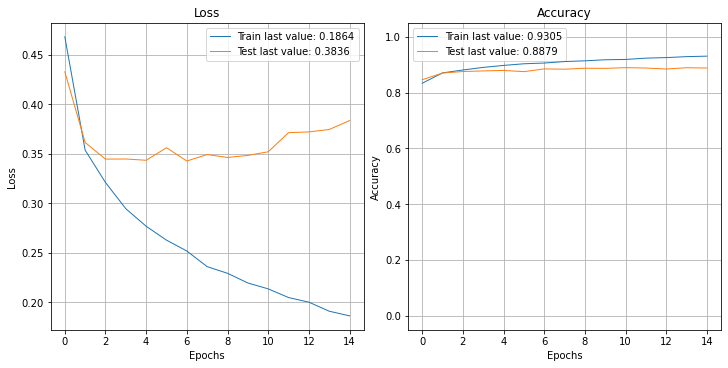

In [21]:
history = model.fit(train_images, train_labels, validation_data=(
    test_images, test_labels), epochs=15)

show_history(history)


# Acurácia

Podemos notar que o nosso modelo tem a acuracia de 88,79% e o modelo demorou 2m e 58s para treinar.

In [24]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nAcuracia:', test_acc)


313/313 - 1s - loss: 0.3836 - accuracy: 0.8879

Acuracia: 0.8879000544548035


# Fazendo predição

In [28]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array[i], true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                       100*np.max(predictions_array),
                                       class_names[true_label]),
             color=color)


def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array[i], true_label[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


[5.1948734e-07 1.1369941e-09 3.0535080e-03 1.1514161e-08 9.9018162e-01
 9.9487840e-12 6.7631006e-03 6.4711647e-12 1.2936065e-06 2.4467603e-10]


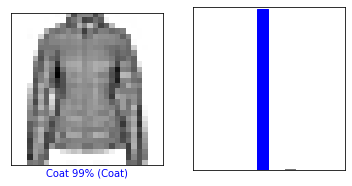

In [30]:
predictions = model.predict(test_images)
predicao = predictions[0]
# Probabilidades de cada classe
print(predicao)
class_names[np.argmax(predicao)]
i = 0
plt.figure(figsize=(6, 3))
plt.subplot(1, 2, 1)
plot_image(i, predictions, test_labels, test_images)
plt.subplot(1, 2, 2)
plot_value_array(i, predictions,  test_labels)
plt.show()


# Agora verificando para 10 itens

Labels preditas corretamente são azuis e as predições erradas são vermelhas.

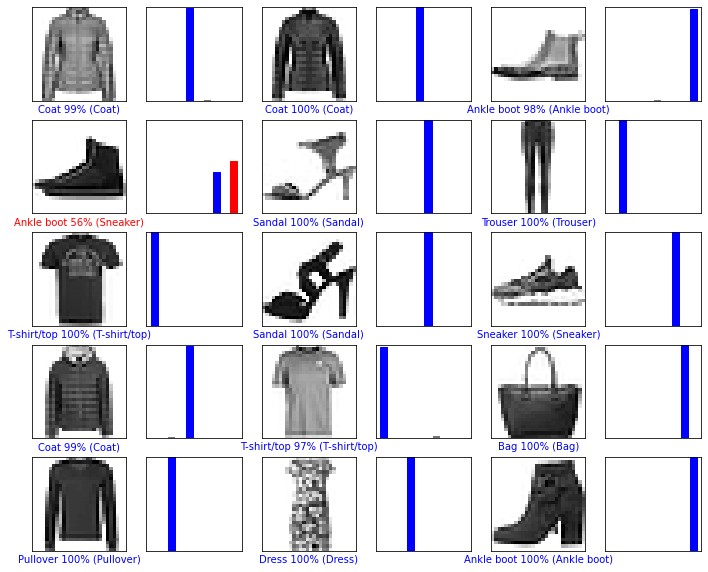

In [31]:
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions, test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions, test_labels)
plt.show()
